In [0]:
from sklearn.datasets import make_circles, make_blobs, make_biclusters, make_moons, make_friedman1, make_biclusters, make_classification
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance
from sklearn.datasets import load_iris, load_breast_cancer, load_wine, load_diabetes, load_digits, fetch_kddcup99,fetch_20newsgroups, fetch_20newsgroups_vectorized, fetch_lfw_people, fetch_rcv1
from sklearn.neighbors import kneighbors_graph
import time
from scipy.io import arff
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [0]:
X, y = make_circles(500, noise=0.1, factor=0.3, random_state=42)

In [0]:
X, y = make_circles(500, noise=0.1, factor=0.3, random_state=42, shuffle=False)

In [0]:
X, y = make_blobs(n_samples=5000, cluster_std=[1.2, 1.7, 0.5], random_state=22, shuffle=False)  

In [0]:
X, y = make_blobs(n_samples=500, cluster_std= 0.25, random_state=22, shuffle=False)

In [0]:
X, y = make_moons(n_samples=500, noise=0.05, random_state=42, shuffle=False)

In [0]:
X, y = make_classification(n_samples=500, n_features=10, n_informative=2, n_redundant=0, n_repeated=0, n_classes=3, n_clusters_per_class=1,class_sep=3,flip_y=0,weights=[0.9,0.1, 0.2], random_state=42, shuffle=False)

In [9]:
X, y = fetch_lfw_people(return_X_y=True)
X=X[:2000]
y=y[:2000]
X.shape

(2000, 2914)

In [10]:
len(set(y))

1344

In [0]:
from scipy.io import arff
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


dataset, meta = arff.loadarff('splice.arff')
df = pd.DataFrame(dataset)
df_original = df.copy()
df.head()

target = 'Class'
y = df_original[target]

features = [col for col in df.columns if col != target]

label_encoded = df.copy()
for col in df.columns:
  label_encoder = LabelEncoder()
  label_encoded[col] = label_encoder.fit_transform(df[col])

print(label_encoded.head())


onehot_encoder = OneHotEncoder(sparse=False, )
one_hot_encoding_features = [col for col in features]
onehot_encoded = onehot_encoder.fit_transform(label_encoded[one_hot_encoding_features])

df_encoded = pd.get_dummies(label_encoded,columns=one_hot_encoding_features)
df_encoded.head()

features_OHE = [col for col in df_encoded.columns if col != target]
df_features_OHE = df_encoded[features_OHE].copy()
df_OHE = df_encoded.copy()
print(df_OHE.head())

features_LE = [col for col in label_encoded.columns if col != target]
df_features_LE = label_encoded[features_LE].copy()
df_LE = label_encoded.copy()

y_encoded = df_OHE[target]
X = df_OHE[features_OHE].values
# X = label_encoded[features].values
y = label_encoded[target]
X.shape

In [0]:
X, y = fetch_kddcup99(return_X_y=True, shuffle=True)
X = X[:10000]
y = y[:10000]
X.shape

In [0]:
X, y = load_iris(return_X_y=True,)
X.shape

In [0]:
X, y = load_wine(return_X_y=True,)
X.shape

In [0]:
X, y = load_breast_cancer(return_X_y=True,)
X.shape

In [0]:
X, y = load_digits(n_class=5,return_X_y=True,)
len(X)

In [0]:
X, y = load_diabetes(return_X_y=True,)
X.shape
# len(set(y))

In [0]:
! pip install cluster

In [0]:
from cluster import 

In [0]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00500/data.zip
! unzip data.zip

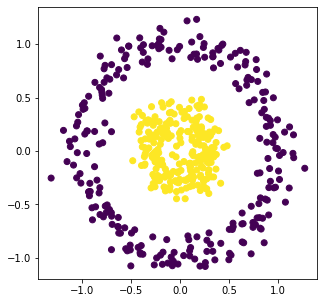

In [13]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y)
# plt.axis('off')
plt.savefig('_gt.png', dpi=300)
plt.show()

In [14]:
np.var(X[:,0])

0.2763948542217059

# PIC Class

In [0]:
import numpy as np
from scipy.stats import mode
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.neighbors import kneighbors_graph
import scipy

class PowerIterationClustering:
    labels_ = None
    cluster_centroids_ = None
    embedding_ = None
    affinity_matrix_ = None
    execution_time_ = None
    n_iterations_ = None

    def __init__(self, n_clusters, max_iter=1000):
        self.n_clusters = n_clusters 
        self.max_iter = max_iter
    
    def fit(self, X, affinity='rbf', k_nn=10):
        """Compute Power Iteration Clustering (PIC).
        Parameters
        ----------
        X : array-like, shape=[n_samples, n_features]
        affinity: similarity metric for the affinity matrix
        """
        if affinity == 'rbf':
            A = np.exp(-distance.cdist(X, X, 'seuclidean')**2/(2*np.var(X))).astype(np.float64)
        elif affinity == 'n_neighbors':
            A = kneighbors_graph(X, k_nn, mode='distance', include_self=True).toarray()
        else:
            A = 1.0 - distance.cdist(X,X, metric=affinity).astype(np.float64)
        print('Finish A')
        self.affinity_matrix_ = A
        start_time = time.time()
        # D_inv = np.zeros(A.shape)
        # np.fill_diagonal(D_inv, 1/np.sum(A,axis=1))
        arr = 1/np.sum(A,axis=1)
        # print('pre inv')
        # W = np.linalg.inv(D) @ A
        # W = D_inv @ A
        # W = np.dot(D_inv,A)
        W = A*arr.reshape((len(arr),1))
        # print('post inv')
        # L = np.identity(W.shape[0]) - W
        v0 = np.sum(A,axis=1) / np.sum(A)
        
        # Run Power Iteration method
        embedding = self.PI(v0, W) 
        self.embedding_ = embedding

        # Compute K-Means on the embedding computed from PI
        kmeans = KMeans(n_clusters=self.n_clusters).fit(embedding.reshape(-1, 1))
        self.labels_ = kmeans.labels_
        self.cluster_centroids_ = kmeans.cluster_centers_
        self.execution_time_ = time.time() - start_time
        return self

    def PI(self, v, W):
        """ Power Iteration method

        v - Initial iteration vector
        W - Normalized affinity matrix
        """
        tol = 1e-5
        epsilon = 1e-5#/len(X)
        delta = float('inf')
        d_prev = float('inf')
        v_prev = v.copy()
        print('entered PIC')
        for t in range(self.max_iter):
            aux = W@v
            # aux = scipy.linalg.blas.sgemv(W,v)
            v = aux / np.linalg.norm(aux, ord=2)
            # v = u.copy()
            delta = np.linalg.norm(v-v_prev, ord=1)
            if abs(delta-d_prev) < epsilon:
                print(f'converged at {t}')
                break
            v_prev = v#.copy()
            d_prev = delta.copy()
        print('finish PI')
        self.n_iterations_ = t
        return v
       
    def plot_embedding(self, y_true, ax=None):
        assert self.embedding_ is not None
        v = self.embedding_
        if ax:
            ax.scatter(range(len(v)), v, c=y_true)
            ax.set_ylim(top=sorted(v)[-1], bottom=sorted(v)[0])
            plt.tight_layout()
        else:
            plt.scatter(range(len(v)), v, c=y_true)
            plt.ylim(top=sorted(v)[-1], bottom=sorted(v)[0])
            plt.tight_layout()
    
    def fit_predict(self, X, similarity='euclidean'):
        return self.fit(X, similarity).labels_


In [16]:
X.shape

(500, 2)

In [17]:
N = 100
A = np.exp(-distance.cdist(X[:], X[:], 'seuclidean')**2/(2*np.var(X))).astype(np.float64)
# A = 1-distance.cdist(X,X, metric='cosine').astype(np.float64)
# A = 1-(distance.cdist(X,X, metric='euclidean').astype(np.float64)/(2*np.var(X)))
# A = 1.0 -(distance.cdist(X,X, metric='seuclidean').astype(np.float64))
print(A.shape)
# A = distance.cdist(X[:], X[:], 'euclidean').astype(np.float64)
D = np.zeros(A.shape).astype(np.float64)
np.fill_diagonal(D, np.sum(A,axis=1))
W = np.linalg.inv(D)@A
L = np.identity(A.shape[0]) - W
L

(500, 500)


array([[ 9.63589423e-01, -2.89014381e-02, -3.47728065e-02, ...,
        -3.39351041e-04, -4.36088510e-03, -5.32971571e-04],
       [-3.06902983e-02,  9.61335783e-01, -3.18597868e-02, ...,
        -2.22604758e-04, -3.83386847e-03, -4.48656401e-04],
       [-3.13388914e-02, -2.70399008e-02,  9.67185072e-01, ...,
        -6.48079314e-04, -6.69682871e-03, -1.02729812e-03],
       ...,
       [-7.46547850e-05, -4.61170215e-05, -1.58194994e-04, ...,
         9.91989935e-01, -4.53226168e-03, -7.42633997e-03],
       [-1.62051802e-03, -1.34163622e-03, -2.76124234e-03, ...,
        -7.65571457e-03,  9.86469720e-01, -9.43002059e-03],
       [-1.24578950e-04, -9.87581243e-05, -2.66436199e-04, ...,
        -7.89054470e-03, -5.93162985e-03,  9.91489243e-01]])

In [0]:
# val, vec = np.linalg.eig(L.astype(np.float64))
# val.shape
# v = vec[:,np.argsort(val,)][1]

In [0]:
# v = np.random.random(size=(W.shape[0],1)).astype(np.float64)
# v = v/np.sum(v)
# v = np.sum(A,axis=1) / np.sum(A)
# init_v = v.copy()
# # v = np.ones(shape=(L.shape[0],1))
# for i in range(500):
#     aux = W@v
#     v = aux / np.linalg.norm(aux, ord=1) 

#     if i%20 == 0:
#         plt.scatter(range(len(v)), v, c=y[:])
#         plt.title(f't={i}')
#         plt.axes().get_yaxis().set_visible(False)
#         plt.ylim(top=sorted(v)[-1], bottom=sorted(v)[0])
#         plt.show()

In [0]:
# v = aux / np.linalg.norm(aux, ord=1)
# plt.scatter(range(len(v)), v, c=y[:])
# plt.title(f't={i}')
# plt.axes().get_yaxis().set_visible(False)
# plt.ylim(top=sorted(v)[-1], bottom=sorted(v)[0])
# plt.show()

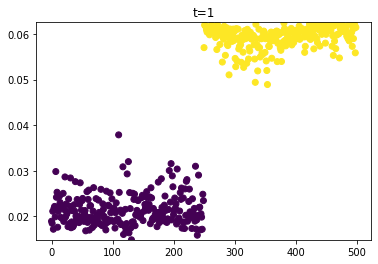

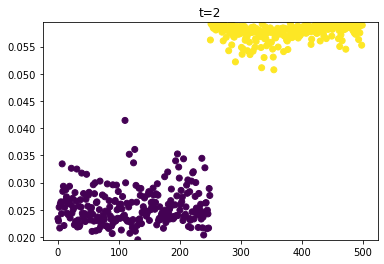

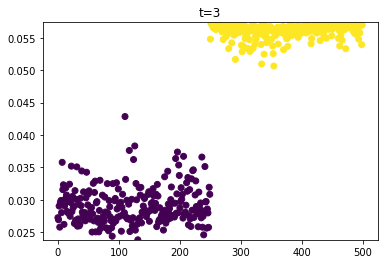

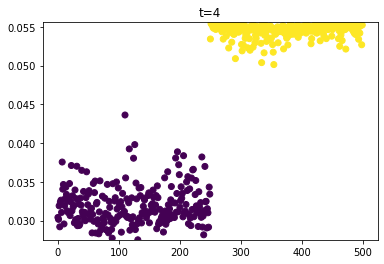

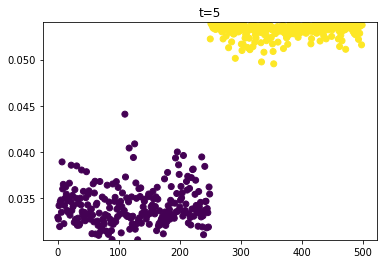

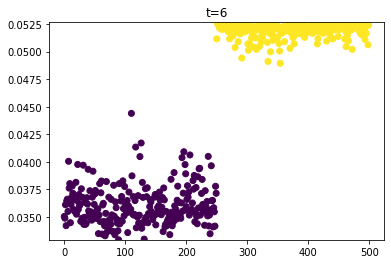

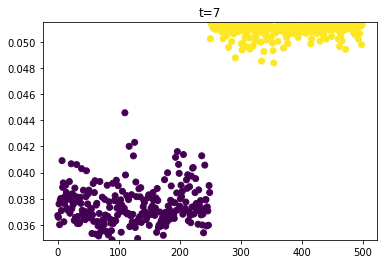

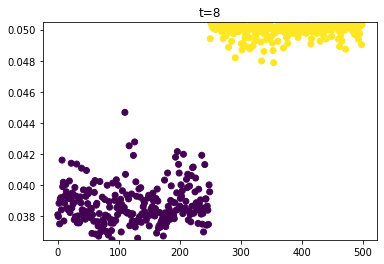

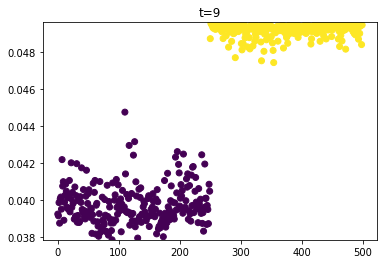

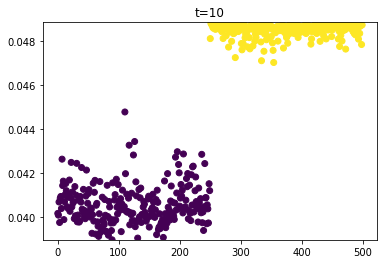

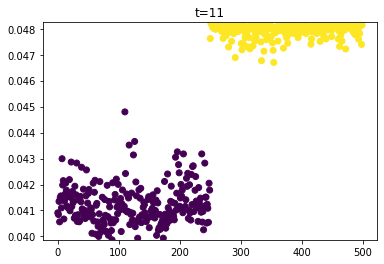

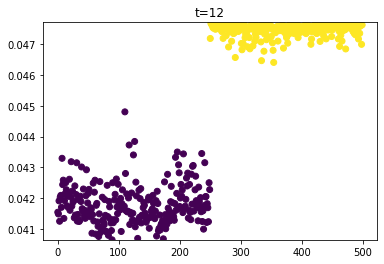

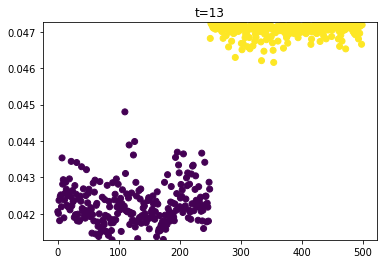

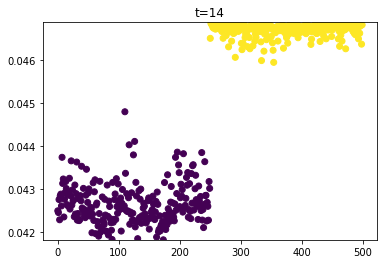

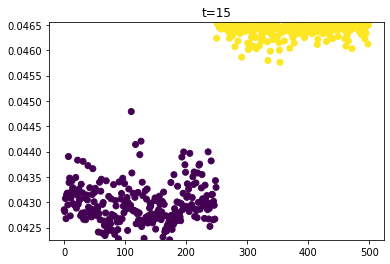

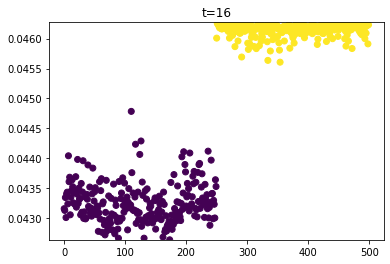

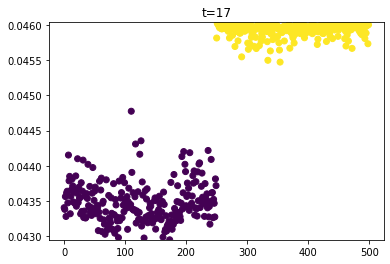

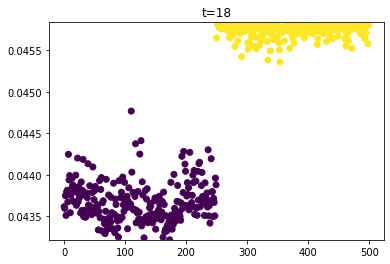

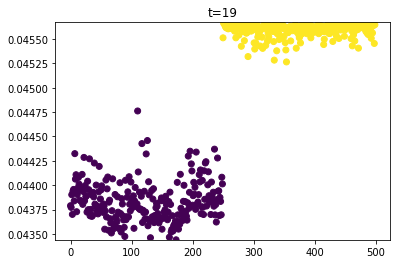

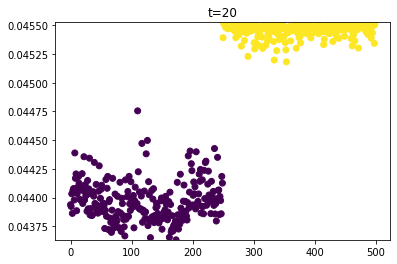

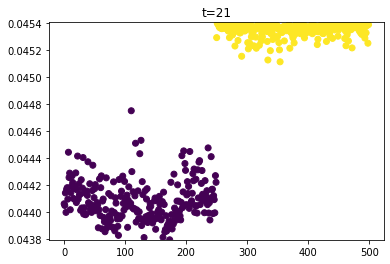

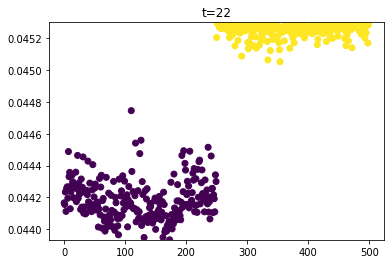

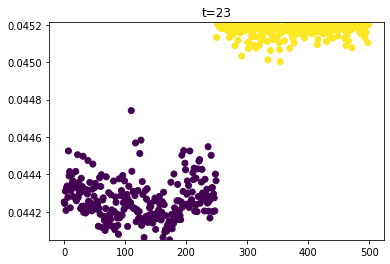

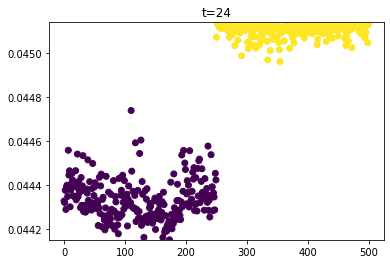

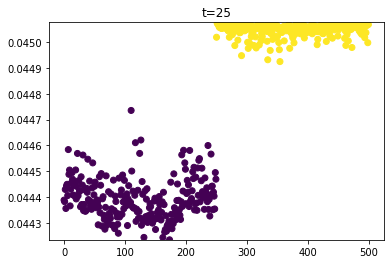

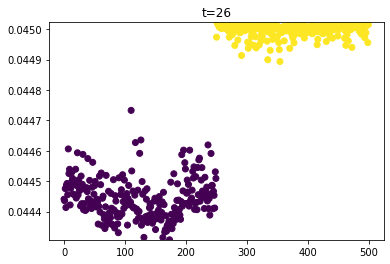

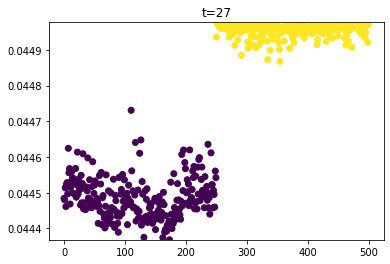

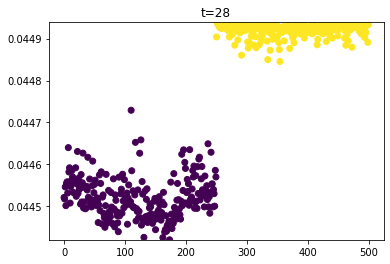

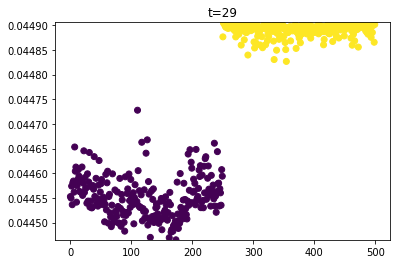

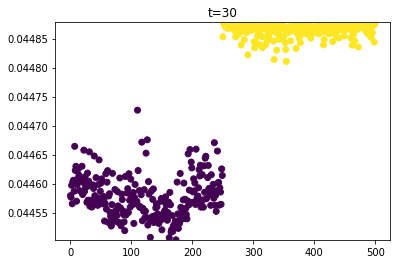

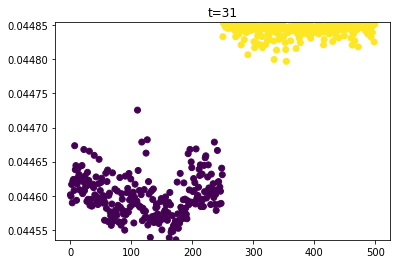

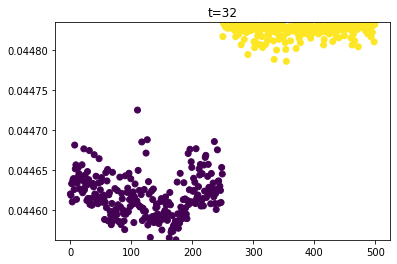

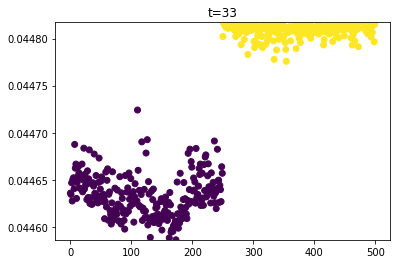

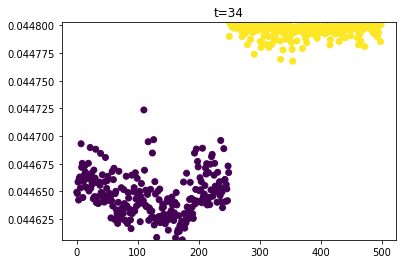

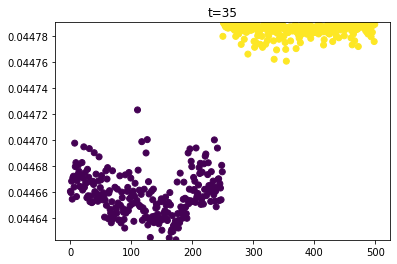

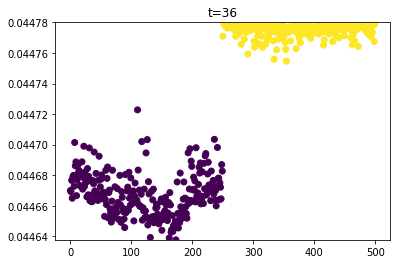

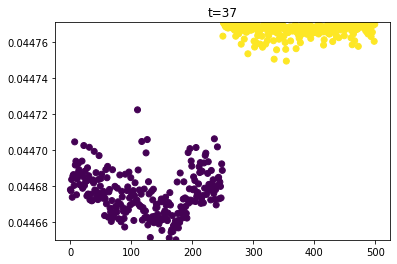

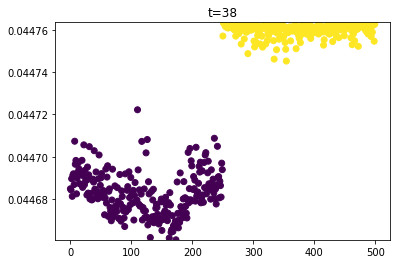

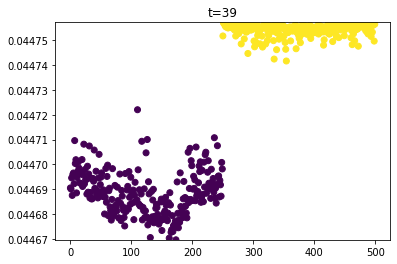

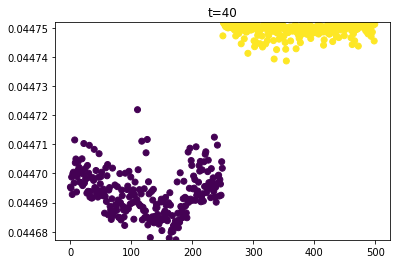

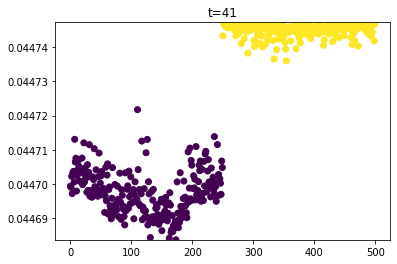

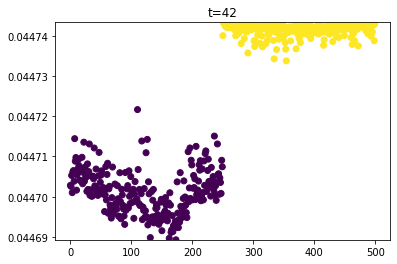

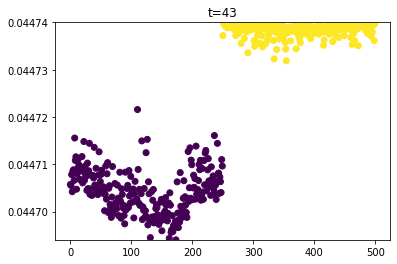

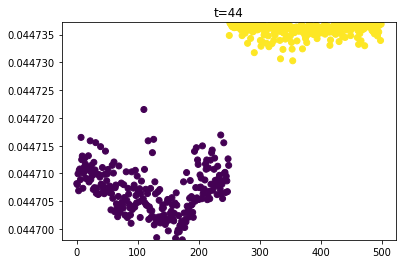

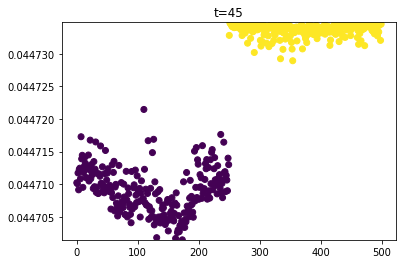

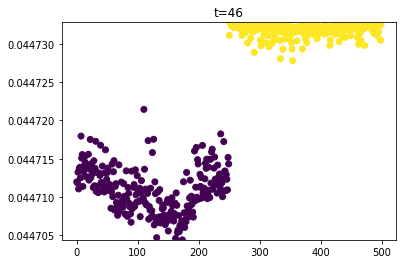

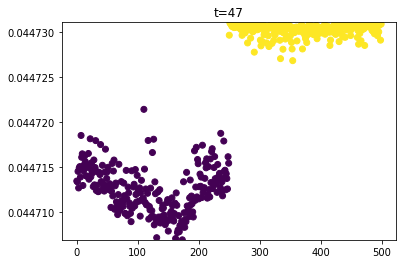

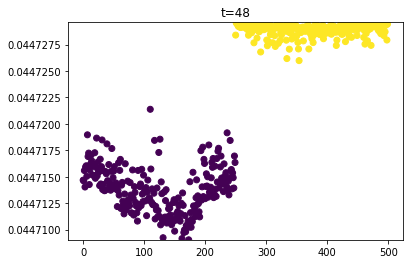

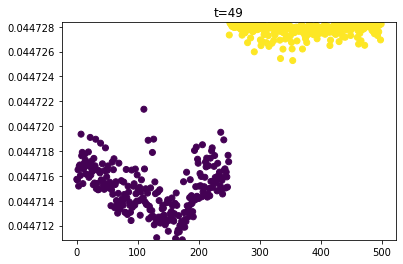

In [21]:
tol = 1e-5
epsilon = 1e-5/len(X)
for i in range(1,50):
    delta = float('inf')
    d_prev = float('inf')
    # v = np.random.random(size=(L.shape[0],1)).asty
    
    # init_v = v.copy()
    # v = init_v.copy()
    # v = np.random.random(size=(L.shape[0],1)).astype(np.float64)
    v = np.sum(A,axis=1) / np.sum(A)
    v_prev = v.copy()
    for _ in range(i):
        # break
        aux = W@v
        u = aux / np.linalg.norm(aux, ord=2)
        v = u.copy()
        delta = np.linalg.norm(v-v_prev, ord=1)
        if abs(delta-d_prev) < epsilon:
            break
        # delta = v-v_prev
        # if np.linalg.norm(np.absolute(delta - d_prev), ord=np.inf) < epsilon:
        #     break
            # pass
        v_prev = v.copy()
        d_prev = delta.copy()

    
    plt.scatter(range(len(v)), v, c=y[:])
    plt.title(f't={i}')
    plt.ylim(top=max(v), bottom=min(v))
    plt.show()
    # if len(set(range(int(np.min(v[y==1][:,0]), np.max(v[y==1][:,0])))) & set(range(int(np.min(v[y==0][:,0]), np.max(v[y==0][:,0]))))) == 0:
    #     break

In [0]:
# v[y==0][:,0]
# # v

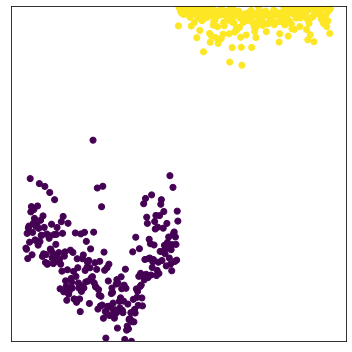

In [24]:
f, ax = plt.subplots(1,1, figsize=(5,5))
# v = pic.embedding_
ax.scatter(range(len(v)), v, c=y[:])
ax.set_ylim(top=sorted(v)[-1], bottom=sorted(v)[0])

# ax[1].scatter([0]*len(v), v, c=y[:])
# ax[1].set_ylim(top=sorted(v)[-10], bottom=sorted(v)[10])
# ax[1].get_yaxis().set_visible(False)

# ax[1].set_xlim(xmin=-0.1, xmax=0.1)
# ax[1].figure.set_size_inches(5.5, 5.5)

ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.tight_layout()
plt.savefig('digits_emb.png', dpi=300)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


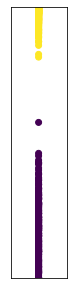

In [25]:
plt.figure(figsize=(1,5))
plt.scatter([1]*len(v), v, c=y[:])
plt.ylim(top=sorted(v)[-10], bottom=sorted(v)[10])
plt.axes().get_yaxis().set_visible(False)
plt.axes().get_xaxis().set_visible(False)
plt.savefig('_1d.png', dpi=300)
plt.show()

# Power Iteration

In [0]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import davies_bouldin_score 

In [0]:
def rename_labels(y_true, y_pred):
    from scipy.stats import mode
    mapping = {}
    for cat in set(y_true):
        predictions = y_pred[y_true == cat]
        predictions = [p for p in predictions if p not in list(mapping.values())]
        print(predictions)
        print(mode(predictions))
        mapping[cat] = mode(predictions)[0][0]
    result = y_pred.copy()
    for cat in set(y_true):
        result[y_pred == mapping[cat]] = cat
    return result

In [0]:
X, y = make_circles(500, noise=0.125, factor=0.3, random_state=42, shuffle=False)

Finish A
entered PIC
converged at 99
finish PI
PIC: 0.04257798194885254 seconds
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
ModeResult(mode=array([1], dtype=int32), count=array([249]))
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

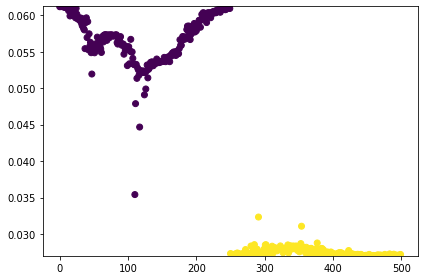

In [29]:
clusters = len(set(y))
pic = PowerIterationClustering(clusters).fit(X, 'n_neighbors', k_nn=10)
# pic = PowerIterationClustering(clusters).fit(X, 'seuclidean')
print(f'PIC: {pic.execution_time_} seconds')
y_pred = rename_labels(y, pic.labels_)
# y_pred = pic.labels_
# print(len(y), len(pic.labels_))
pic.plot_embedding(y)

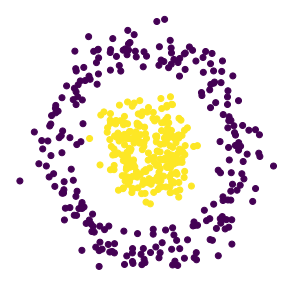

In [30]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.axis('off')
plt.savefig('result_pic.png', dpi=300)
plt.show()

In [0]:
from sklearn.cluster import KMeans, SpectralClustering, spectral_clustering

In [0]:
# k_means = KMeans(3).fit(v.reshape(-1, 1))
# y_pred = rename_labels(y,k_means.labels_)

In [33]:
start_time = time.time()
kmeans = KMeans(n_clusters=clusters, ).fit(X)
print(f'k-means: {time.time() - start_time} seconds')

start_time = time.time()
spectral = SpectralClustering(clusters, affinity='nearest_neighbors').fit(X).labels_
# spectral = SpectralClustering(clusters, affinity='rbf').fit(X).labels_
# spectral = spectral_clustering(pic.affinity_matrix_, n_clusters=clusters, n_init=10)
print(f'N-Cuts: {time.time() - start_time} seconds')


k-means: 0.04779219627380371 seconds
N-Cuts: 0.12497472763061523 seconds


In [34]:
len(set(y))

2

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ModeResult(mode=array([0], dtype=int32), count=array([248]))
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

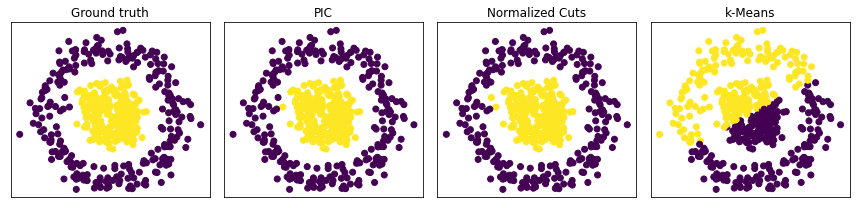

In [35]:
f, ax =  plt.subplots(1,4, figsize=(12,3))

ax[0].scatter(X[:,0], X[:,1], c=y, label='Ground truth')
ax[0].set_title('Ground truth')
ax[1].scatter(X[:,0], X[:,1], c=y_pred, )
ax[1].set_title('PIC')
# ax[2].scatter(X[:,0], X[:,1], c=rename_labels(y,spectral.labels_), )
ax[2].scatter(X[:,0], X[:,1], c=rename_labels(y,spectral), )
ax[2].set_title('Normalized Cuts')
ax[3].scatter(X[:,0], X[:,1], c=rename_labels(y,kmeans.labels_), )
ax[3].set_title('k-Means')
for i in range(4):
    ax[i].get_yaxis().set_visible(False)
    ax[i].get_xaxis().set_visible(False)
plt.tight_layout()
plt.savefig('comparison.png', dpi=300)
plt.show()

In [36]:
spectral

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [37]:
# y_pred_ = rename_labels(y,k_means.labels_)

s_pred = rename_labels(y, spectral)
k_pred = rename_labels(y, kmeans.labels_)
for pred in [y_pred, s_pred, k_pred]:
    print(f1_score(y, pred, average='macro'))
    print(accuracy_score(y, pred))
    print()


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ModeResult(mode=array([0], dtype=int32), count=array([248]))
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [38]:
def purity_score(y_true, y_pred):
    cm = contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(cm, axis=0)) / np.sum(cm)

# for pred in [y_pred, s_pred, k_pred]:
for pred in [y_pred, spectral, kmeans.labels_]:
    print(f'{purity_score(y, pred):.4f}', f'{normalized_mutual_info_score(y, pred):.4f}', f'{adjusted_rand_score(y, pred):.4f}')
    # print(normalized_mutual_info_score(y, pred))
    # print(adjusted_rand_score(y, pred))
    print()

0.9980 0.9812 0.9920

0.9960 0.9664 0.9840

0.5200 0.0012 -0.0004



## Metrics


Finish A
entered PIC
converged at 73
finish PI
Finish A
entered PIC
converged at 238
finish PI
Finish A
entered PIC
converged at 56
finish PI
Finish A
entered PIC
converged at 26
finish PI
Finish A
entered PIC
converged at 9
finish PI


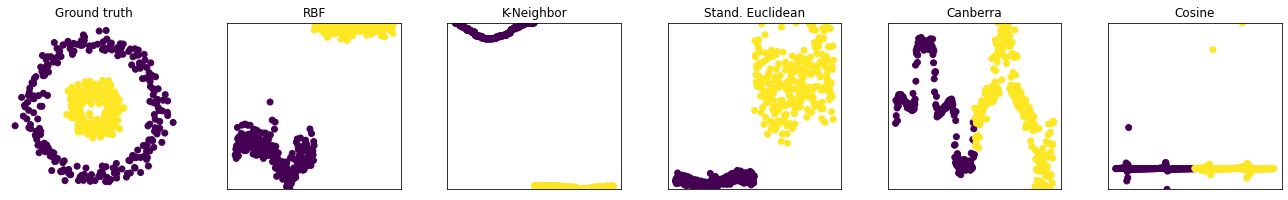

In [39]:
X, y = make_circles(500, noise=0.08, factor=0.3, random_state=42, shuffle=False)
# X, y = make_moons(500, noise=0.08, random_state=42, shuffle=False)
clusters = len(set(y))
pic0 = PowerIterationClustering(clusters).fit(X, 'rbf')
pic1 = PowerIterationClustering(clusters).fit(X, 'n_neighbors')
pic2 = PowerIterationClustering(clusters).fit(X, 'seuclidean')
pic3 = PowerIterationClustering(clusters).fit(X, 'canberra')
pic4 = PowerIterationClustering(clusters).fit(X, 'cosine')
f, ax = plt.subplots(1,6, figsize=(18,3))
ax[0].scatter(X[:,0], X[:,1], c=y)
ax[0].axis('off')
pic0.plot_embedding(y,ax[1])
pic1.plot_embedding(y,ax[2])
pic2.plot_embedding(y,ax[3])
pic3.plot_embedding(y,ax[4])
pic4.plot_embedding(y,ax[5])
for i in range(6):
    ax[i].get_yaxis().set_visible(False)
    ax[i].get_xaxis().set_visible(False)
ax[0].set_title('Ground truth')
ax[1].set_title('RBF')
ax[2].set_title('K-Neighbor')
ax[3].set_title('Stand. Euclidean')
ax[4].set_title('Canberra')
ax[5].set_title('Cosine')
plt.savefig('metrics.png',dpi=300)

## Performance


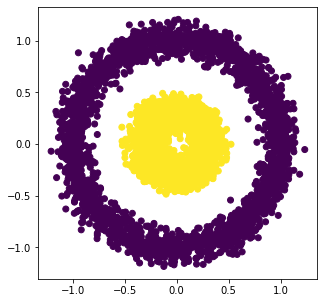

In [40]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_redundant=0, n_repeated=0, n_classes=3, n_clusters_per_class=1,class_sep=3,flip_y=0,weights=[0.9,0.1, 0.2], random_state=42, shuffle=False)
X, y = make_circles(5000, noise=0.08, factor=0.3, random_state=42, shuffle=False)

from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y)
# plt.axis('off')
plt.savefig('_gt.png', dpi=300)
plt.show()

Finish A
entered PIC
converged at 25
finish PI
PIC: 0.5440027713775635 seconds
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

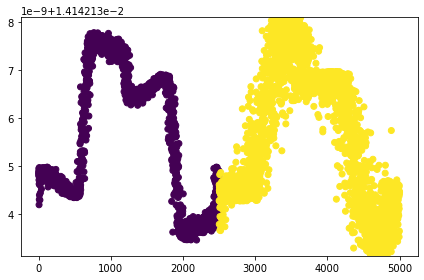

In [41]:
clusters = len(set(y))
pic = PowerIterationClustering(clusters).fit(X, 'canberra', k_nn=100)
# pic = PowerIterationClustering(clusters).fit(X, 'seuclidean')
print(f'PIC: {pic.execution_time_} seconds')
y_pred = rename_labels(y, pic.labels_)

# y_pred = pic.labels_
# print(len(y), len(pic.labels_))
pic.plot_embedding(y)

Finish A
entered PIC
converged at 100
finish PI


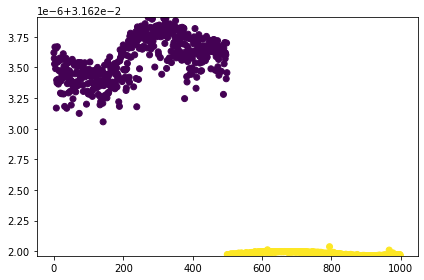

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:212: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


1000
PIC: 0.07160091400146484 seconds
N-Cuts: 0.1514890193939209 seconds
Finish A
entered PIC
converged at 79
finish PI


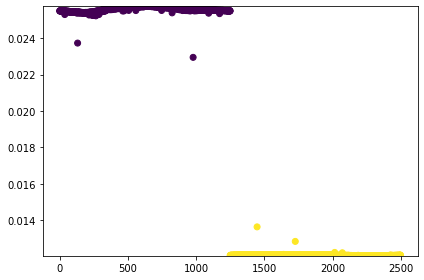

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:212: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


2500
PIC: 0.31624817848205566 seconds
N-Cuts: 1.0649664402008057 seconds
Finish A
entered PIC
converged at 188
finish PI


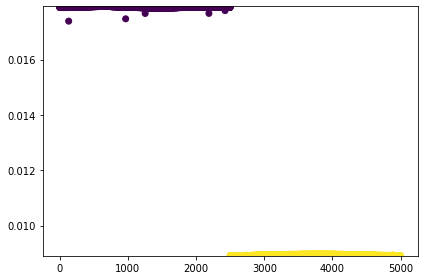

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:212: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


5000
PIC: 3.12967848777771 seconds
N-Cuts: 5.701818466186523 seconds
Finish A
entered PIC
converged at 211
finish PI


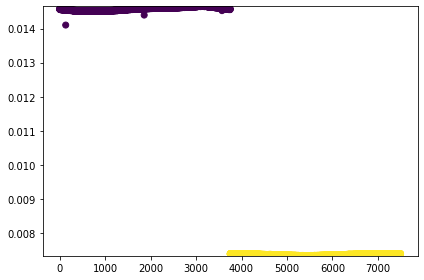

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:212: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


7500
PIC: 7.869554042816162 seconds
N-Cuts: 17.09132409095764 seconds
Finish A
entered PIC
converged at 190
finish PI


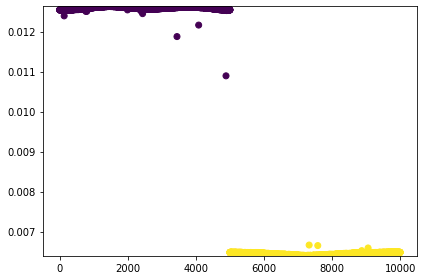

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:212: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


10000
PIC: 12.406328201293945 seconds
N-Cuts: 34.57018423080444 seconds
Finish A
entered PIC
converged at 224
finish PI


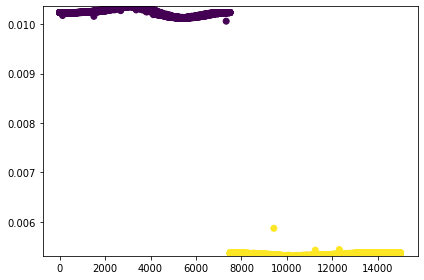

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:212: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


15000
PIC: 32.80779576301575 seconds
N-Cuts: 111.38760137557983 seconds


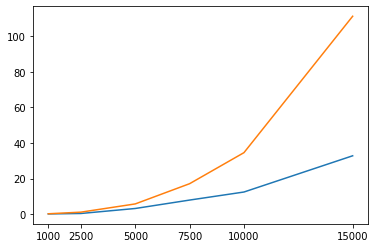

In [42]:
from sklearn.utils.validation import check_symmetric

ptimes = []
stimes = []
iterations = []
sizes = [1000,2500,5000, 7500, 10000, 15000]
for N in sizes:


    X, y = make_circles(N, noise=0.08, factor=0.3, random_state=42, shuffle=False)
    y = LabelEncoder().fit_transform(y)
    clusters = len(set(y))
    pic = PowerIterationClustering(clusters).fit(X, 'n_neighbors', k_nn=100)
    pic.plot_embedding(y)
    plt.show()

    # A = check_symmetric(pic.affinity_matrix_,)
    A = pic.affinity_matrix_
    start_time = time.time()
    spectral = spectral_clustering(A, n_clusters=clusters, n_init=10, eigen_tol=1e-5)
    stime = time.time() - start_time
    print(N)
    print(f'PIC: {pic.execution_time_} seconds')
    print(f'N-Cuts: {stime} seconds')

    ptimes.append(pic.execution_time_)
    stimes.append(stime)
    iterations.append(pic.n_iterations_)

plt.plot(sizes, ptimes)
plt.plot(sizes, stimes)
plt.xticks(sizes)
plt.show()

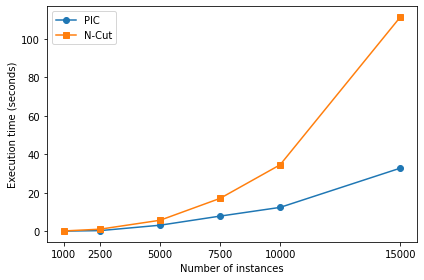

In [43]:
# sizes = [1000,2000,5000,10000]
plt.plot(sizes, ptimes, 'o-', label='PIC')
plt.plot(sizes, stimes, 's-', label='N-Cut')
plt.ylabel('Execution time (seconds)')
plt.xlabel('Number of instances')
plt.xticks(sizes)
plt.legend()
plt.tight_layout()
plt.savefig('time_pic_2.png', dpi=300)
plt.show()

In [44]:

print('Dataset size &', ' & '.join(map(str,sizes)), '\\\\')
print('iterations &', ' & '.join(map(str,iterations)), '\\\\')
print('Exec. time &', ' & '.join(map(lambda n: f'{n:.4f}',ptimes)), '\\\\')
print('N-Cut &', ' & '.join(map(lambda n: f'{n:.4f}',stimes)),  '\\\\')

Dataset size & 1000 & 2500 & 5000 & 7500 & 10000 & 15000 \\
iterations & 100 & 79 & 188 & 211 & 190 & 224 \\
Exec. time & 0.0716 & 0.3162 & 3.1297 & 7.8696 & 12.4063 & 32.8078 \\
N-Cut & 0.1515 & 1.0650 & 5.7018 & 17.0913 & 34.5702 & 111.3876 \\


In [45]:
from scipy.stats import pearsonr
pearsonr(sizes, iterations)

(0.8314743329492358, 0.040208210335354946)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  """Entry point for launching an IPython kernel.


N-Cuts: 101.77477431297302 seconds


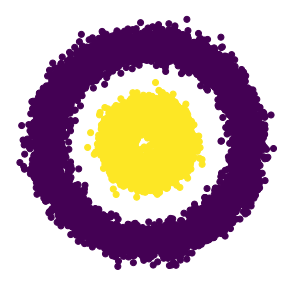

In [46]:
A = check_symmetric(pic.affinity_matrix_,)
start_time = time.time()
spectral = spectral_clustering(A, n_clusters=clusters, n_init=10, eigen_tol=1e-5)
stime = time.time() - start_time
print(f'N-Cuts: {stime} seconds')

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=spectral)
plt.axis('off')
plt.savefig('result_pic.png', dpi=300)
plt.show()